In [1]:
from useful_scit.plot.fig_manip import subp_insert_abc

In [2]:
from sectional_v2.constants import get_plotpath
from sectional_v2.util.practical_functions import make_folders
from IPython.display import clear_output



plot_path = get_plotpath('comparison') +'prof_map_abs'
print(plot_path)
make_folders(plot_path)
fn_base = plot_path + '/abs_'
print(fn_base)
make_folders(fn_base)

/home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME/
/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison/prof_map_abs
/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison/prof_map_abs/abs_


In [3]:
from sectional_v2.util.plot.plot_maps import plot_map_diff, fix_axis4map_plot, plot_map_abs_abs_diff, plot_map,plot_map_diff_only
from useful_scit.imps import (np, xr, plt, pd) 
from sectional_v2.util.imports import get_averaged_fields
from sectional_v2.util.plot.plot_profiles import plot_profile, set_legend_area_profs, set_scalar_formatter

# load and autoreload
from useful_scit.plot import get_cmap_dic
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

/home/ubuntu/mnts/nird/projects/SECTIONAL_v2/sectional_v2/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from matplotlib import gridspec

In [5]:
model = 'NorESM'

startyear = '2008-01'
endyear = '2014-12'
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
if avg_over_lev:
    pressure_adjust = True
p_levels = [1013.,900., 800., 700., 600.]  # used if not avg

In [6]:
cases_sec = ['SECTv21_ctrl_koagD']
cases_orig =['noSECTv21_default_dd','noSECTv21_ox_ricc_dd']
case_sec = cases_sec[0]
cases = cases_orig + cases_sec

## Combined plots

In [7]:
import cartopy.crs as ccrs

## N_AER

## H2SO4

In [8]:
from sectional_v2.util.plot.colors import get_area_col
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from sectional_v2.data_info import get_nice_name_case

In [9]:
linests = ['solid','dashed','dotted'][::-1]
linests = ['solid','-.',':'][::-1]

In [10]:
areas = ['Global','notLand','landOnly','Amazonas and surroundings', 'Polar N','Polar S']

In [11]:
import seaborn as sns

In [12]:
linestd=dict()
linestd_nn=dict()
for case, ls in zip(cases, linests):
    linestd[case]=ls
    linestd_nn[get_nice_name_case(case)]=ls

In [13]:
        
def plot_prof_map_together(var, areas, cases, axs, var_map=None, map_kwargs={}):
    if axs is None:
        fig = plt.figure(figsize = [width,asp_rat*width])
        gs = gridspec.GridSpec(2, 2,height_ratios=[1,1.], width_ratios=[5,1])#width_ratios=[2, 1]) 
        ax1 = plt.subplot(gs[1,0])
        ax2 = plt.subplot(gs[1,1])
        ax3 = plt.subplot(gs[0,:], projection=ccrs.Robinson())
        axs=[ax1,ax2,ax3]
        ax2.axis('off')
        cases_nn = [get_nice_name_case(case) for case in cases]
        
        set_legend_area_profs(ax2, areas,cases_nn, linestd_nn)
    ax1 = axs[0]
    ax3 = axs[1]
    
    
    cmapd = get_cmap_dic(areas)
    
    ax =ax1# plt.subplots(1, figsize=[6,8])
    
    for area in areas:
        prof_dic = get_averaged_fields.get_profiles(cases,varl,startyear, endyear,area=area,
                                                  pressure_adjust=pressure_adjust)
    
        for case in cases:
            kwargs = dict(color=get_area_col(area), linestyle=linestd[case])
            plot_profile(prof_dic[case][var], 
                         ax=ax, 
                         kwargs=kwargs, 
                         xscale='log', 
                         label=case+', '+ area,
                         ylim=[1000,200])#, 
    ax.grid(False, which='both')
    sns.despine(ax=ax)
    ax.set_yscale('log')
    
    
    set_scalar_formatter(ax)
    
    # maps:
    if var_map is not None:
        var=var_map
    maps_dic = get_averaged_fields.get_maps_cases(cases,[var],startyear, endyear,
                                       avg_over_lev=avg_over_lev,
                                       pmin=pmin,
                                       pressure_adjust=pressure_adjust)
    
    plot_map(var, cases[0], maps_dic, figsize=None,
             ax=ax3, cmap_abs='Reds', cbar_orientation='horizontal', kwargs_abs=map_kwargs)
    
    
    
    #plt.tight_layout()
    return 

def plt_prof_map_together_ls(var1,var2, areas, cases, asp_rat=1, width=5.5, varl_map=None, map_kwargs={},height_rat = 1.3):
    nvars = 2
    fig = plt.figure(figsize = [width*nvars,asp_rat*width*nvars])
    gs = gridspec.GridSpec(2, nvars+1,height_ratios=[1,height_rat], width_ratios=[5,5,1])#width_ratios=[2, 1]) 
    axs_prof = []
    axs_maps = []
    ax1 = plt.subplot(gs[1,0])
    ax2 = None#plt.subplot(gs[1,1+i*2])
    ax3 = plt.subplot(gs[0,0], projection=ccrs.Robinson())
    print(var1,areas, cases, [ax1,ax3])
    if varl_map is None:
        var1m =None
        var2m =None
    else:
        var1m=varl_map[0]
        var2m=varl_map[1]
        
    plot_prof_map_together(var1, areas, cases, [ax1,ax3], var_map=var1m, map_kwargs=map_kwargs)
    axs_maps.append(ax3)
    axs_prof.append(ax1)
    ax1 = plt.subplot(gs[1,1])
    ax2 = plt.subplot(gs[1,2])
    ax3 = plt.subplot(gs[0,1], projection=ccrs.Robinson())
    plot_prof_map_together(var2, areas, cases, [ax1,ax3], var_map=var2m, map_kwargs=map_kwargs)
    axs_maps.append(ax3)
    axs_prof.append(ax1)
    #plt.setp(ax1, visible=False)
    axs_all = axs_maps+axs_prof+[ax2]
    
    
    ax2.axis('off')
    linestd=dict()
    linestd_nn=dict()
    for case, ls in zip(cases, linests):
        linestd[case]=ls
        linestd_nn[get_nice_name_case(case)]=ls
    ax =ax1# plt.subplots(1, figsize=[6,8])
    cases_nn = [get_nice_name_case(case) for case in cases]
    
    set_legend_area_profs(ax2, areas,cases_nn, linestd_nn)
    
    
    ax1.yaxis.set_ticklabels([])
    ax1.set_ylabel('')
    return fig, axs_maps, axs_prof, axs_all

## NA-mode

In [14]:
areas = ['Global','notLand','landOnly']#,'Amazonas and surroundings', 'Polar N','Polar S']

nrSEC_tot ['Global', 'notLand', 'landOnly'] ['SECTv21_ctrl_koagD'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3f49291d0>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7fd3d848d438>]
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/nrSEC_tot_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/nrSEC_tot_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/nrSEC_tot_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/nrSEC_tot_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Ou

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_default_dd/Global/N_AER_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/N_AER_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/N_AER_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_default_dd/notLand/N_AER_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/notLand/N_AER_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl_koagD/notLand/N_AER_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_S

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


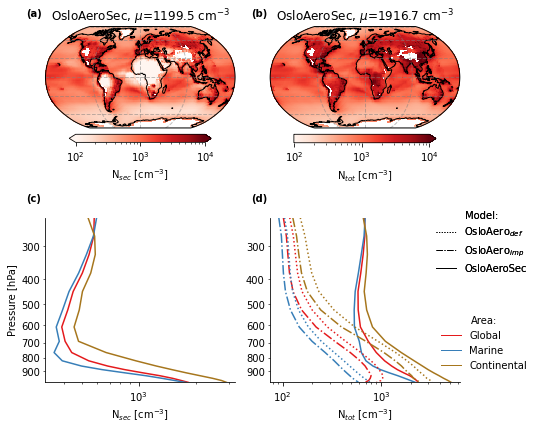

In [15]:
from matplotlib.colors import LogNorm
varl = ['nrSEC_tot','N_secmod']
vmin=1e2
vmax=1e4
norm=LogNorm(vmin=vmin, vmax=vmax)
map_kwargs=dict(norm=norm)
fig, axs_maps, axs_prof,axs_all = plt_prof_map_together_ls(*varl, areas, [case_sec], asp_rat=.8, width=3.8, map_kwargs=map_kwargs)
# plot extra vars for orig cases
for area in areas:
    prof_dic = get_averaged_fields.get_profiles(cases,['N_AER'],startyear, endyear,area=area,
                                                  pressure_adjust=pressure_adjust)
    
    for case in cases_orig:
        kwargs = dict(color=get_area_col(area), linestyle=linestd[case])
        prof_dic[case]['N_secmod']=prof_dic[case]['N_AER']
        plot_profile(prof_dic[case]['N_secmod'], 
                         ax=axs_prof[1], 
                         kwargs=kwargs, 
                         xscale='log', 
                         label=case+', '+ area,
                         ylim=[1000,200])#, 

        
axs_lab = axs_all[-1]
axs_lab.clear()
axs_lab.axis('off')

cases_nn = [get_nice_name_case(case) for case in cases]
set_legend_area_profs(axs_lab, areas,cases_nn, linestd_nn, 
                      loc_case='upper right', 
                      loc_area='lower right',
                      bbox_to_anchor_area=(.68, .02, .4, 1.),
                      bbox_to_anchor_case=(.68, .8, .4, .3))
ax = axs_prof[1]
ax.tick_params(labelleft=False)
ax.yaxis.set_ticklabels([])
ax.set_ylabel('')
ax.grid(False, which='both')
sns.despine(ax=ax)
ax.set_yscale('log')
set_scalar_formatter(ax)
    
ax.grid(False, which='both')

subp_insert_abc(np.array(axs_all[:-1]))
plt.tight_layout()

vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

nrSEC_tot ['Global', 'notLand', 'landOnly'] ['SECTv21_ctrl_koagD'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5c03fa160>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7fc5c03e1828>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/nrSEC_tot_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/N_secmod_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl_koagD/notLand/nrSEC_tot_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl_koagD/notLand/N_secmod_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl_koagD/landOnly/nrSEC_tot_2008-01-2009-12.nc
Loadin

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


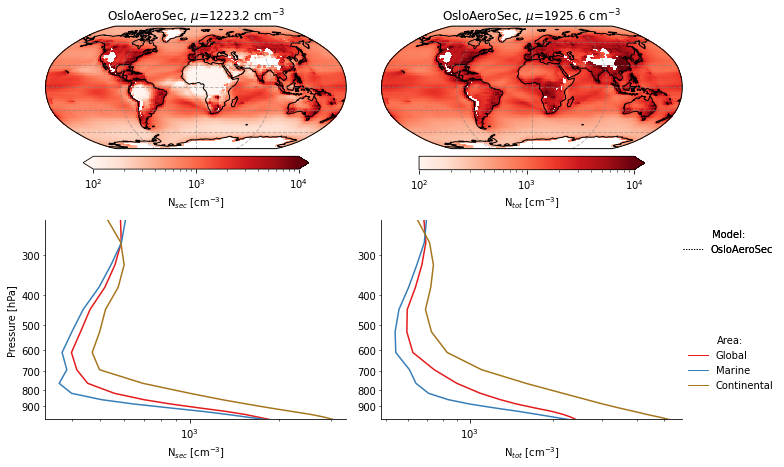

In [25]:
from matplotlib.colors import LogNorm
varl = ['nrSEC_tot','N_secmod']
vmin=1e2
vmax=1e4
norm=LogNorm(vmin=vmin, vmax=vmax)
map_kwargs=dict(norm=norm)
fig, axs_maps, axs_prof, axs_all = plt_prof_map_together_ls(*varl, areas, [case_sec], asp_rat=.6, width=5.5, map_kwargs=map_kwargs)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)

#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

nrSEC_tot ['Global', 'notLand', 'landOnly'] ['SECTv21_ctrl_koagD'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5bde0b048>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7fc5bde2bc88>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/nrSEC_tot_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/N_secmod_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl_koagD/notLand/nrSEC_tot_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl_koagD/notLand/N_secmod_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl_koagD/landOnly/nrSEC_tot_2008-01-2009-12.nc
Loadin

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


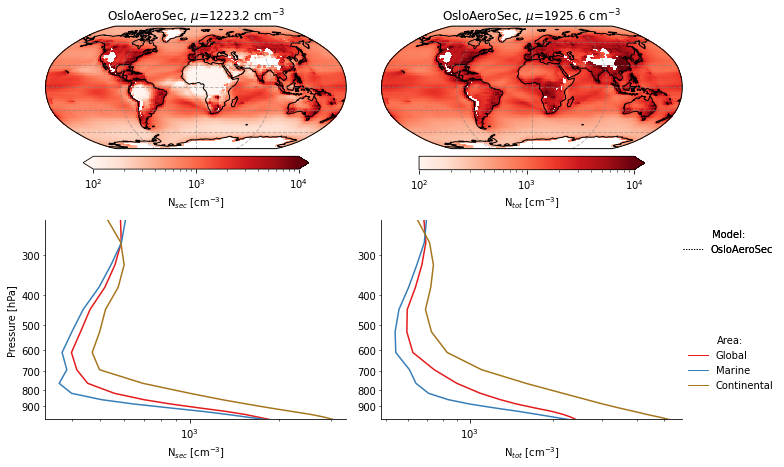

In [17]:
from matplotlib.colors import LogNorm
varl = ['nrSEC_tot','N_secmod']
vmin=1e2
vmax=1e4
norm=LogNorm(vmin=vmin, vmax=vmax)
map_kwargs=dict(norm=norm)
fig, axs_maps, axs_prof, axs_all = plt_prof_map_together_ls(*varl, areas, [case_sec], asp_rat=.6, width=5.5, map_kwargs=map_kwargs)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)

#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

nrSEC_tot ['Global', 'notLand', 'landOnly', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['SECTv21_ctrl'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa362f86e10>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7fa362f6ee80>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/nrSEC_tot_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/notLand/nrSEC_tot_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/notLand/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/landOnly/nrSEC_tot_2008-01-2009

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


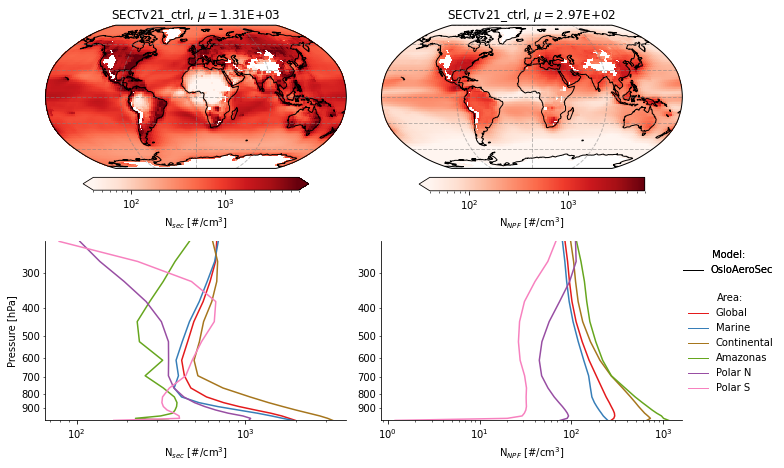

In [13]:
from matplotlib.colors import LogNorm
#varl = ['nrSEC_tot','N_secmod']
varl = ['nrSEC_tot','NCONC01']
vmin=4e1
vmax=6e3
norm=LogNorm(vmin=vmin, vmax=vmax)
map_kwargs=dict(norm=norm)
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, [case_sec], asp_rat=.6, width=5.5, map_kwargs=map_kwargs)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

N_AER ['Global', 'notLand', 'landOnly', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['noSECTv21_ox_ricc'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7fa366d35a20>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7fa3631a5860>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/Global/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/Global/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/notLand/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/notLand/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/noSECTv21_ox_ricc/landOnly/N_AE

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


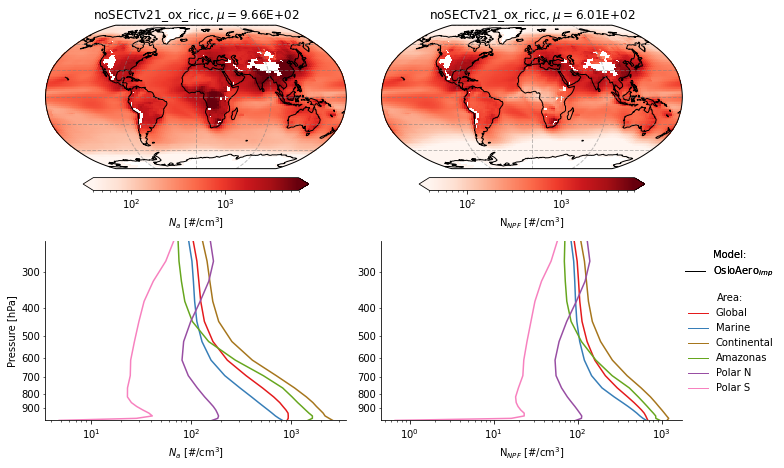

In [14]:
from matplotlib.colors import LogNorm
#varl = ['nrSEC_tot','N_secmod']
varl = ['N_AER','NCONC01']
vmin=4e1
vmax=6e3
norm=LogNorm(vmin=vmin, vmax=vmax)
map_kwargs=dict(norm=norm)
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, [cases_orig[0]], asp_rat=.6, width=5.5, map_kwargs=map_kwargs)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

nrSEC_tot ['Global', 'Pacific', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['SECTv21_ctrl'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7f381d3f42e8>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f381d372fd0>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/nrSEC_tot_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Pacific/nrSEC_tot_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Pacific/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Amazonas_and_surroundings/nrSEC_tot_2008-01-200

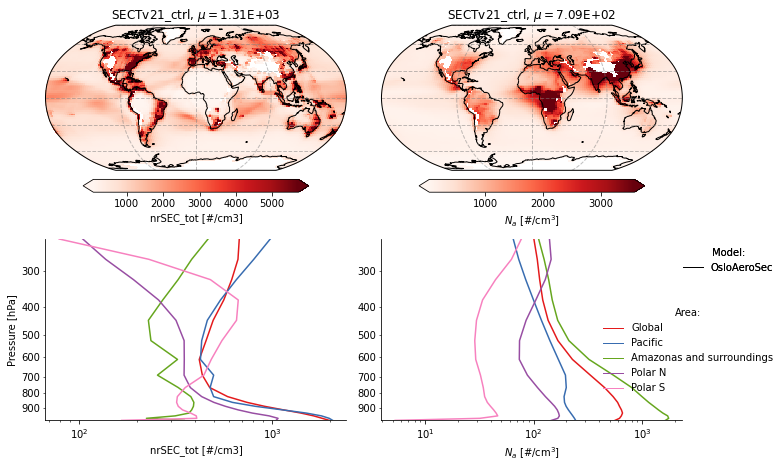

In [20]:

varl = ['nrSEC_tot','N_AER']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, [case_sec], asp_rat=.6, width=5.5)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

nrSEC_tot ['Global', 'Pacific', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['SECTv21_ctrl'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7f381d292b38>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f381d2a3be0>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/nrSEC_tot_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/SEC_tot_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Pacific/nrSEC_tot_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Pacific/SEC_tot_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Amazonas_and_surroundings/nrSEC_tot_2008-01

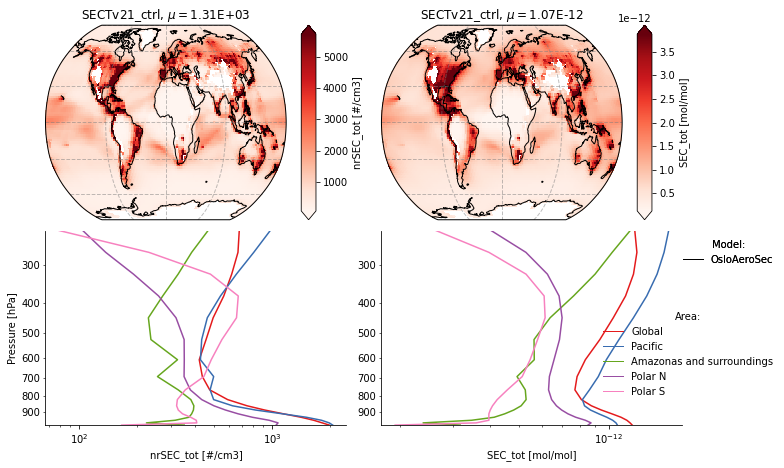

In [13]:

varl = ['nrSEC_tot','SEC_tot']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, [case_sec], asp_rat=.6, width=5.5)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

nrSO4_SEC_tot ['Global', 'Pacific', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['SECTv21_ctrl'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7f38174a7e80>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f381739b1d0>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/nrSO4_SEC_tot_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Global/nrSOA_SEC_tot_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Pacific/nrSO4_SEC_tot_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Pacific/nrSOA_SEC_tot_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/profile_means//NorESM/SECTv21_ctrl/Amazonas_and_surrou

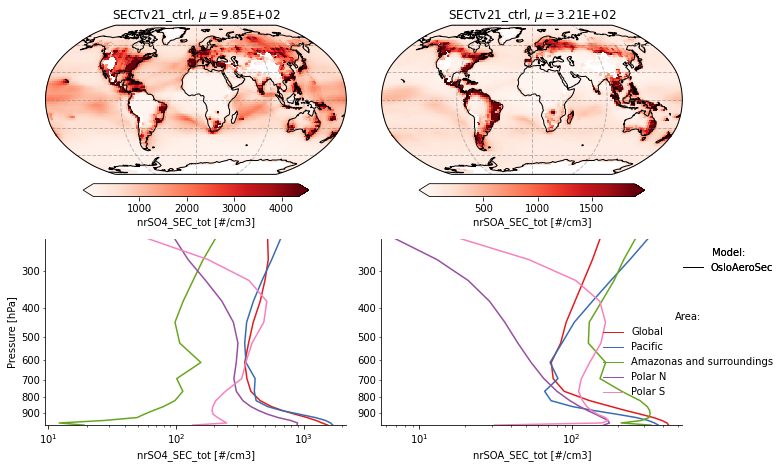

In [21]:

varl = ['nrSO4_SEC_tot','nrSOA_SEC_tot']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, [case_sec], asp_rat=.6, width=5.5, map_kwargs={})
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()